## Final Project Submission

Please fill out:
* Student name: Vivienne DiFrancesco
* Student pace: Full Time
* Scheduled project review date/time: 
* Instructor name: James Irving
* Blog post URL:


# Introduction: Analysis of Film Trends


The movie industry can feel like playing a game of chance. Movies can be a great investment or totally flop. [With the average major studio movie costing around $100 million to make](https://www.investopedia.com/financial-edge/0611/why-movies-cost-so-much-to-make.aspx#:~:text=The%20average%20cost%20to%20produce,to%20right%20about%20%24100%20million.), making a movie should not be entered into lightly. It can be difficult for new studios to come to the market without some knowledge on how to maximize the chance of a hit.

I set out on this project to make concrete recommendations for how to make a profitable movie. Of course there is no guarantee of success, but with good data making a profitable movie can feel less like luck and more like skill. There are seemingly endless metrics to analyze; many more, at least, than what I lay out here. But my hope is to make useful and actionable recommendations. I share my process from beginning to end for critique of my findings, further analysis, or simply testing if my results could be replicated.

# Data to DataFrame

I got my data from [Box Office Mojo](https://www.boxofficemojo.com). The site had great information for the gross profits of the movies and each page was neatly organized by year. The URL was also simple to break down for the different years which made it possible to write into a function for scraping. 

For more information on how I scraped my data, I put that code and explanation in a separate notebook in this same folder of work.

In [53]:
# Importing necessary libraries
import numpy as np
import pandas as pd

In [54]:
# Turning my data into a dataframe
df = pd.read_csv('BoxOfficeMojoScrapeFinal.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,Year_Rank,Title,Worldwide_Gross,Domestic,Percent_Domestic,Foreign,Percent_Foreign,Year,Domestic Distributor,Domestic Opening,Budget,Earliest Release Date,MPAA,Running Time,Genres,\n IMDbPro\n
0,0,0,1,Bad Boys for Life,"$419,074,646","$204,417,855",48.8%,"$214,656,791",51.2%,2020,Sony Pictures Entertainment (SPE)See full comp...,"$62,504,105","$90,000,000","January 15, 2020\n (LATAM, APAC)",R,2 hr 4 min,Action\n \n Comedy\n \n Cr...,See more details at IMDbPro\n\n
1,1,1,2,Sonic the Hedgehog,"$306,766,470","$146,066,470",47.6%,"$160,700,000",52.4%,2020,Paramount PicturesSee full company information...,"$58,018,348","$85,000,000","February 12, 2020\n (APAC, EMEA)",PG,1 hr 39 min,Action\n \n Adventure\n \n ...,See more details at IMDbPro\n\n
2,2,2,3,Dolittle,"$224,752,486","$77,047,065",34.3%,"$147,705,421",65.7%,2020,Universal PicturesSee full company information...,"$21,844,045","$175,000,000","January 8, 2020\n (South Korea)",PG,1 hr 41 min,Adventure\n \n Comedy\n \n ...,See more details at IMDbPro\n\n
3,3,3,4,Birds of Prey: And the Fantabulous Emancipatio...,"$201,858,461","$84,158,461",41.7%,"$117,700,000",58.3%,2020,Warner Bros.See full company information\n\n,"$33,010,017","$84,500,000","February 5, 2020\n (APAC, EMEA)",R,1 hr 49 min,Action\n \n Adventure\n \n ...,See more details at IMDbPro\n\n
4,4,4,5,The Invisible Man,"$128,251,913","$64,914,050",50.6%,"$63,337,863",49.4%,2020,Universal PicturesSee full company information...,"$28,205,665","$7,000,000","February 26, 2020\n (EMEA, APAC)",R,2 hr 4 min,Horror\n \n Mystery\n \n S...,See more details at IMDbPro\n\n


In [55]:
# Setting pandas to display all the rows of my dataframes
pd.set_option('display.max_rows', None)

In [56]:
# Setting pandas to NOT use scientific notation 
# when displaying the number values of my data
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [57]:
# Checking number of columns and rows
df.shape

(12728, 18)

In [58]:
# Looking at my columns, data types, and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12728 entries, 0 to 12727
Data columns (total 18 columns):
Unnamed: 0                                               12728 non-null int64
Unnamed: 0.1                                             12728 non-null int64
Year_Rank                                                12728 non-null int64
Title                                                    12728 non-null object
Worldwide_Gross                                          12728 non-null object
Domestic                                                 12728 non-null object
Percent_Domestic                                         12728 non-null object
Foreign                                                  12728 non-null object
Percent_Foreign                                          12728 non-null object
Year                                                     12728 non-null int64
Domestic Distributor                                     12298 non-null object
Domestic Opening          

I created a new column before cleaning so that in the cleaning process as I fill empty values and change data types, I wouldn't lose the ability to filter by what entries have budget information.

In [59]:
# Creating new column for filtering by what entries have budget information
df['Budget_notna'] = df['Budget'].notna()
df.head()

,Unnamed: 0,Unnamed: 0.1,Year_Rank,Title,Worldwide_Gross,Domestic,Percent_Domestic,Foreign,Percent_Foreign,Year,Domestic Distributor,Domestic Opening,Budget,Earliest Release Date,MPAA,Running Time,Genres,\n IMDbPro\n,Budget_notna
0,0,0,1,Bad Boys for Life,"$419,074,646","$204,417,855",48.8%,"$214,656,791",51.2%,2020,Sony Pictures Entertainment (SPE)See full comp...,"$62,504,105","$90,000,000","January 15, 2020\n (LATAM, APAC)",R,2 hr 4 min,Action\n \n Comedy\n \n Cr...,See more details at IMDbPro\n\n,True
1,1,1,2,Sonic the Hedgehog,"$306,766,470","$146,066,470",47.6%,"$160,700,000",52.4%,2020,Paramount PicturesSee full company information...,"$58,018,348","$85,000,000","February 12, 2020\n (APAC, EMEA)",PG,1 hr 39 min,Action\n \n Adventure\n \n ...,See more details at IMDbPro\n\n,True
2,2,2,3,Dolittle,"$224,752,486","$77,047,065",34.3%,"$147,705,421",65.7%,2020,Universal PicturesSee full company information...,"$21,844,045","$175,000,000","January 8, 2020\n (South Korea)",PG,1 hr 41 min,Adventure\n \n Comedy\n \n ...,See more details at IMDbPro\n\n,True
3,3,3,4,Birds of Prey: And the Fantabulous Emancipatio...,"$201,858,461","$84,158,461",41.7%,"$117,700,000",58.3%,2020,Warner Bros.See full company information\n\n,"$33,010,017","$84,500,000","February 5, 2020\n (APAC, EMEA)",R,1 hr 49 min,Action\n \n Adventure\n \n ...,See more details at IMDbPro\n\n,True
4,4,4,5,The Invisible Man,"$128,251,913","$64,914,050",50.6%,"$63,337,863",49.4%,2020,Universal PicturesSee full company information...,"$28,205,665","$7,000,000","February 26, 2020\n (EMEA, APAC)",R,2 hr 4 min,Horror\n \n Mystery\n \n S...,See more details at IMDbPro\n\n,True


#  Cleaning the Data

## Cleaning money value columns

The money values from my scrape started as strings and have '$' and ',' characters. Those characters need to be removed before casting them as an integer data type.

In [60]:
# Making a list of the money columns to iterate through.
money_columns = ['Worldwide_Gross', 'Domestic', 'Foreign', 'Domestic Opening', 'Budget']
# Filling the null values with 0 as a string to keep the data types consistent in the column.
for column in money_columns:
    df[column] = df[column].fillna('0')


I made sure to cast each column as string values because I was getting errors when I tried to go on before doing this. There must have been some rogue values that were imported into the dataframe as a different data type.

In [61]:
# Making sure every value is a string.
df['Worldwide_Gross'] = df['Worldwide_Gross'].astype('str')
df['Domestic'] = df['Domestic'].astype('str')
df['Foreign'] = df['Foreign'].astype('str')
df['Domestic Opening'] = df['Domestic Opening'].astype('str')
df['Budget'] = df['Budget'].astype('str')

I created a function to replace all the non-numeric characters with nothing. Some of my columns contained '-' characters from the scrape when there was no information. I filled those in with zeros as strings like I did before when I used .fillna().

In [62]:
# Iterates through each item to replace all the characters with nothing
# or with zeros as string type.
def clean_money(x):
    return x.replace('$', '').replace(',', '').replace('-', '0')

In [63]:
# Looping through the same list of money columns as before to apply
# the clean money function to each one. 
for column in money_columns:
    df[column] = df[column].map(clean_money)

In [64]:
# Checking out if the function worked. All looks good
df.head()

,Unnamed: 0,Unnamed: 0.1,Year_Rank,Title,Worldwide_Gross,Domestic,Percent_Domestic,Foreign,Percent_Foreign,Year,Domestic Distributor,Domestic Opening,Budget,Earliest Release Date,MPAA,Running Time,Genres,\n IMDbPro\n,Budget_notna
0,0,0,1,Bad Boys for Life,419074646,204417855,48.8%,214656791,51.2%,2020,Sony Pictures Entertainment (SPE)See full comp...,62504105,90000000,"January 15, 2020\n (LATAM, APAC)",R,2 hr 4 min,Action\n \n Comedy\n \n Cr...,See more details at IMDbPro\n\n,True
1,1,1,2,Sonic the Hedgehog,306766470,146066470,47.6%,160700000,52.4%,2020,Paramount PicturesSee full company information...,58018348,85000000,"February 12, 2020\n (APAC, EMEA)",PG,1 hr 39 min,Action\n \n Adventure\n \n ...,See more details at IMDbPro\n\n,True
2,2,2,3,Dolittle,224752486,77047065,34.3%,147705421,65.7%,2020,Universal PicturesSee full company information...,21844045,175000000,"January 8, 2020\n (South Korea)",PG,1 hr 41 min,Adventure\n \n Comedy\n \n ...,See more details at IMDbPro\n\n,True
3,3,3,4,Birds of Prey: And the Fantabulous Emancipatio...,201858461,84158461,41.7%,117700000,58.3%,2020,Warner Bros.See full company information\n\n,33010017,84500000,"February 5, 2020\n (APAC, EMEA)",R,1 hr 49 min,Action\n \n Adventure\n \n ...,See more details at IMDbPro\n\n,True
4,4,4,5,The Invisible Man,128251913,64914050,50.6%,63337863,49.4%,2020,Universal PicturesSee full company information...,28205665,7000000,"February 26, 2020\n (EMEA, APAC)",R,2 hr 4 min,Horror\n \n Mystery\n \n S...,See more details at IMDbPro\n\n,True


When I tried to go straight from string to integer, I was getting errors. I had to change the types to float first and then to int64. By default the 'int' type was trying to change to int32 and was causing errors as they were already in a 64-bit type object. 

In [65]:
# Changing each column to float type and then to int64
for column in money_columns:
    df[column] = df[column].astype('float')
    df[column] = df[column].astype('int64')

In [66]:
# Checking that all data types are as they should be.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12728 entries, 0 to 12727
Data columns (total 19 columns):
Unnamed: 0                                               12728 non-null int64
Unnamed: 0.1                                             12728 non-null int64
Year_Rank                                                12728 non-null int64
Title                                                    12728 non-null object
Worldwide_Gross                                          12728 non-null int64
Domestic                                                 12728 non-null int64
Percent_Domestic                                         12728 non-null object
Foreign                                                  12728 non-null int64
Percent_Foreign                                          12728 non-null object
Year                                                     12728 non-null int64
Domestic Distributor                                     12298 non-null object
Domestic Opening             

## Cleaning Genres

The genres got scraped as strings with all the genres of that movie listed. The goal was to use .split() and have each entry be a clean list.

In [67]:
# Checking for null values
df['Genres'].isna().sum()

34

In [68]:
# Filling nulls with the word 'none'
df['Genres'] = df['Genres'].fillna('none')

In [69]:
# Making sure that every entry is a string so that errors do not occur.
df['Genres'] = df['Genres'].astype('str')

In [70]:
# Iterating through each entry to split the items into a tidy list.
df['Genres'] = df['Genres'].map(lambda x: x.split())

In [71]:
# Checking to make sure the entries look right.
df['Genres'].head(10)

0                  [Action, Comedy, Crime, Thriller]
1        [Action, Adventure, Comedy, Family, Sci-Fi]
2               [Adventure, Comedy, Family, Fantasy]
3                         [Action, Adventure, Crime]
4                [Horror, Mystery, Sci-Fi, Thriller]
5    [Adventure, Animation, Comedy, Family, Fantasy]
6                         [Adventure, Drama, Family]
7    [Adventure, Fantasy, Horror, Mystery, Thriller]
8                 [Action, Horror, Sci-Fi, Thriller]
9                                [History, Thriller]
Name: Genres, dtype: object

## Cleaning Running Time

The running time for each movie was listed in a 'x hr y min' format. Some entries that were even hours did not contain a min entry and some entries that were very short had no hr entry. The goal was to turn this into an integer type column. I turned each entry into a dictionary with 'hr' and 'min' keys so that I could do the simple math on the values of turning each entry into the length of the movie in minutes. Then I could turn each entry into an integer.

In [72]:
# Checking for null values
df['Running Time'].isna().sum()

57

In [73]:
# Filling the null values with zero time keeping the regularity of
# how the values are already listed in the column.
df['Running Time'] = df['Running Time'].fillna('0 min')

In [74]:
# Making sure that each entry is a string type.
df['Running Time'] = df['Running Time'].astype('str')

In [75]:
# Double checking that nulls got filled and the type is a string.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12728 entries, 0 to 12727
Data columns (total 19 columns):
Unnamed: 0                                               12728 non-null int64
Unnamed: 0.1                                             12728 non-null int64
Year_Rank                                                12728 non-null int64
Title                                                    12728 non-null object
Worldwide_Gross                                          12728 non-null int64
Domestic                                                 12728 non-null int64
Percent_Domestic                                         12728 non-null object
Foreign                                                  12728 non-null int64
Percent_Foreign                                          12728 non-null object
Year                                                     12728 non-null int64
Domestic Distributor                                     12298 non-null object
Domestic Opening             

In [76]:
# Creating the function to turn the values into a dictionary and then to
# an integer value of the length of the movie in minutes.
def time_change(x):
    # Split each item so that entries would be a list of ['x', 'hr', 'y', 'min']
    time_list = x.split()
    # Turning the lists into dictionaries with the even entries of the list being
    # the keys and the odd being the values.
    time_dict = dict(zip(time_list[1::2], time_list[::2]))
    # Making accomodations for entries that did not have an 'hr' or 'min' entry
    if 'hr' not in time_dict:
        time_dict['hr'] = '0'
    if 'min' not in time_dict:
        time_dict['min'] = '0'
    # Doing the math to turn it into minutes and make each entry an integer
    time = (int(time_dict['hr']) *60) + (int(time_dict['min']))

    return time

In [77]:
# Running the function on the column
df['Running Time'] = df['Running Time'].map(time_change)


In [78]:
# Checking that everything worked
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12728 entries, 0 to 12727
Data columns (total 19 columns):
Unnamed: 0                                               12728 non-null int64
Unnamed: 0.1                                             12728 non-null int64
Year_Rank                                                12728 non-null int64
Title                                                    12728 non-null object
Worldwide_Gross                                          12728 non-null int64
Domestic                                                 12728 non-null int64
Percent_Domestic                                         12728 non-null object
Foreign                                                  12728 non-null int64
Percent_Foreign                                          12728 non-null object
Year                                                     12728 non-null int64
Domestic Distributor                                     12298 non-null object
Domestic Opening             

## Earliest Release Month Column

I wanted to be able to look at what month movies were released as part of my analysis. I had a column that contained the earliest release date so the goal was to take the month value only from the column and put it into a new column.

In [79]:
# Checking for null values
df['Earliest Release Date'].isna().sum()

0

In [80]:
# Making sure that all entries are strings.
df['Earliest Release Date'] = df['Earliest Release Date'].astype('str')

In [81]:
# Checking the format of the entries
df['Earliest Release Date'].head()

0    January 15, 2020\n            (LATAM, APAC)
1    February 12, 2020\n            (APAC, EMEA)
2     January 8, 2020\n            (South Korea)
3     February 5, 2020\n            (APAC, EMEA)
4    February 26, 2020\n            (EMEA, APAC)
Name: Earliest Release Date, dtype: object

In [82]:
# Creating a function the take the month from the entries
def release_month(x):
    # Split the text
    text = x.split()
    # Take the first item which was always the month
    month = text[0]
    return month

In [83]:
# Create the new column with the months only.
df['Earliest Release Month'] = df['Earliest Release Date'].map(release_month)

In [84]:
# Check that everything worked.
df.head()

,Unnamed: 0,Unnamed: 0.1,Year_Rank,Title,Worldwide_Gross,Domestic,Percent_Domestic,Foreign,Percent_Foreign,Year,Domestic Distributor,Domestic Opening,Budget,Earliest Release Date,MPAA,Running Time,Genres,\n IMDbPro\n,Budget_notna,Earliest Release Month
0,0,0,1,Bad Boys for Life,419074646,204417855,48.8%,214656791,51.2%,2020,Sony Pictures Entertainment (SPE)See full comp...,62504105,90000000,"January 15, 2020\n (LATAM, APAC)",R,124,"[Action, Comedy, Crime, Thriller]",See more details at IMDbPro\n\n,True,January
1,1,1,2,Sonic the Hedgehog,306766470,146066470,47.6%,160700000,52.4%,2020,Paramount PicturesSee full company information...,58018348,85000000,"February 12, 2020\n (APAC, EMEA)",PG,99,"[Action, Adventure, Comedy, Family, Sci-Fi]",See more details at IMDbPro\n\n,True,February
2,2,2,3,Dolittle,224752486,77047065,34.3%,147705421,65.7%,2020,Universal PicturesSee full company information...,21844045,175000000,"January 8, 2020\n (South Korea)",PG,101,"[Adventure, Comedy, Family, Fantasy]",See more details at IMDbPro\n\n,True,January
3,3,3,4,Birds of Prey: And the Fantabulous Emancipatio...,201858461,84158461,41.7%,117700000,58.3%,2020,Warner Bros.See full company information\n\n,33010017,84500000,"February 5, 2020\n (APAC, EMEA)",R,109,"[Action, Adventure, Crime]",See more details at IMDbPro\n\n,True,February
4,4,4,5,The Invisible Man,128251913,64914050,50.6%,63337863,49.4%,2020,Universal PicturesSee full company information...,28205665,7000000,"February 26, 2020\n (EMEA, APAC)",R,124,"[Horror, Mystery, Sci-Fi, Thriller]",See more details at IMDbPro\n\n,True,February


## Dropped Unnessecary Columns

In [85]:
# You can see that I have some columns that provide no information
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Year_Rank', 'Title', 'Worldwide_Gross',
       'Domestic', 'Percent_Domestic', 'Foreign', 'Percent_Foreign', 'Year',
       'Domestic Distributor', 'Domestic Opening', 'Budget',
       'Earliest Release Date', 'MPAA', 'Running Time', 'Genres',
       '\n                        IMDbPro\n                    ',
       'Budget_notna', 'Earliest Release Month'],
      dtype='object')

In [86]:
# Getting rid of these columns from my dataframe
df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', '\n                        IMDbPro\n                    '], inplace=True)


In [87]:
# Verifying that the columns are now gone
df.columns

Index(['Year_Rank', 'Title', 'Worldwide_Gross', 'Domestic', 'Percent_Domestic',
       'Foreign', 'Percent_Foreign', 'Year', 'Domestic Distributor',
       'Domestic Opening', 'Budget', 'Earliest Release Date', 'MPAA',
       'Running Time', 'Genres', 'Budget_notna', 'Earliest Release Month'],
      dtype='object')

In [88]:
# Looking to make sure that my dataframe is cleaned up and eveyrhting is how I want it.
df.head()

,Year_Rank,Title,Worldwide_Gross,Domestic,Percent_Domestic,Foreign,Percent_Foreign,Year,Domestic Distributor,Domestic Opening,Budget,Earliest Release Date,MPAA,Running Time,Genres,Budget_notna,Earliest Release Month
0,1,Bad Boys for Life,419074646,204417855,48.8%,214656791,51.2%,2020,Sony Pictures Entertainment (SPE)See full comp...,62504105,90000000,"January 15, 2020\n (LATAM, APAC)",R,124,"[Action, Comedy, Crime, Thriller]",True,January
1,2,Sonic the Hedgehog,306766470,146066470,47.6%,160700000,52.4%,2020,Paramount PicturesSee full company information...,58018348,85000000,"February 12, 2020\n (APAC, EMEA)",PG,99,"[Action, Adventure, Comedy, Family, Sci-Fi]",True,February
2,3,Dolittle,224752486,77047065,34.3%,147705421,65.7%,2020,Universal PicturesSee full company information...,21844045,175000000,"January 8, 2020\n (South Korea)",PG,101,"[Adventure, Comedy, Family, Fantasy]",True,January
3,4,Birds of Prey: And the Fantabulous Emancipatio...,201858461,84158461,41.7%,117700000,58.3%,2020,Warner Bros.See full company information\n\n,33010017,84500000,"February 5, 2020\n (APAC, EMEA)",R,109,"[Action, Adventure, Crime]",True,February
4,5,The Invisible Man,128251913,64914050,50.6%,63337863,49.4%,2020,Universal PicturesSee full company information...,28205665,7000000,"February 26, 2020\n (EMEA, APAC)",R,124,"[Horror, Mystery, Sci-Fi, Thriller]",True,February


# Creating a Budgets Sub DataFrame

The budget entries were crucial to how I wanted to do the majority of my analysis. How do you know much much a movie really made without knowing how much money was spent to make the movie? I wanted to create a dataframe using just the subset of entries that included the budget. Before doing that I had to make sure that the budget information was well distributed amongst my data so that I would not have glaring gaps in my data that would skew results. This is where the column I created earlier to show the entries where I had budget data came in handy. I checked the distribution of the budget entries across a few different values.

In [89]:
# Checking to see if the budget data is distributed across the years
df.groupby(['Year'])['Budget_notna'].value_counts()

Year  Budget_notna
2000  False           220
      True            157
2001  False           261
      True            146
2002  False           350
      True            160
2003  False           354
      True            152
2004  False           403
      True            152
2005  False           401
      True            154
2006  False           481
      True            149
2007  False           574
      True            107
2008  False           474
      True            136
2009  False           374
      True            145
2010  False           391
      True            192
2011  False           427
      True            170
2012  False           568
      True            126
2013  False           582
      True            125
2014  False           598
      True            124
2015  False           606
      True            124
2016  False           646
      True            117
2017  False           666
      True            113
2018  False           769
      True         

In [90]:
# Checking to see if the budget data is distributed well across the year rankings of the movies.
# Here I actually wanted to see that I had more budget data for the bigger and
# and more well known movies that were ranked higher. 
df.groupby(['Year_Rank'])['Budget_notna'].value_counts()

Year_Rank  Budget_notna
1          True            19
           False            2
2          True            19
           False            2
3          True            19
           False            2
4          True            17
           False            4
5          True            19
           False            2
6          True            19
           False            2
7          True            20
           False            1
8          True            21
9          True            18
           False            3
10         True            20
           False            1
11         True            18
           False            3
12         True            18
           False            3
13         True            19
           False            2
14         True            16
           False            5
15         True            20
           False            1
16         True            18
           False            3
17         True            18
           False

In [91]:
# Checking to see that budget data is distributed across MPAA ratings
df.groupby(['MPAA'])['Budget_notna'].value_counts()

MPAA       Budget_notna
G          False             60
           True              25
M/PG       False              2
NC-17      False              7
           True               5
Not Rated  False             36
PG         False            591
           True             442
PG-13      False           1214
           True            1118
R          False           2744
           True            1073
TV-PG      False              1
Unrated    False              4
Name: Budget_notna, dtype: int64

In [92]:
# Checking to see that budget data is distributed across release months.
df.groupby(['Earliest Release Month'])['Budget_notna'].value_counts()

Earliest Release Month  Budget_notna
April                   False            866
                        True             235
August                  False            865
                        True             245
December                False            642
                        True             267
February                False            682
                        True             211
January                 False            627
                        True             166
July                    False            693
                        True             211
June                    False            761
                        True             237
March                   False            890
                        True             225
May                     False            804
                        True             207
November                False            845
                        True             238
October                 False           1093
                  

## Creating the New DataFrame

I was satisfied with my checks that there were no glaring holes in how the budget data was distributed across the movies. It may not be completely perfectly distributed, but the value of being able to use the budget data far outweighs any minor dissatisfaction. I created a dataframe for the entries with budget information to be able to do my analyzing of trends on how much money movies make.

In [93]:
# Creating the dataframe based on the criteria that the entries contain a budget
df_budgets = df[df['Budget_notna'] == True]
df_budgets.head()

,Year_Rank,Title,Worldwide_Gross,Domestic,Percent_Domestic,Foreign,Percent_Foreign,Year,Domestic Distributor,Domestic Opening,Budget,Earliest Release Date,MPAA,Running Time,Genres,Budget_notna,Earliest Release Month
0,1,Bad Boys for Life,419074646,204417855,48.8%,214656791,51.2%,2020,Sony Pictures Entertainment (SPE)See full comp...,62504105,90000000,"January 15, 2020\n (LATAM, APAC)",R,124,"[Action, Comedy, Crime, Thriller]",True,January
1,2,Sonic the Hedgehog,306766470,146066470,47.6%,160700000,52.4%,2020,Paramount PicturesSee full company information...,58018348,85000000,"February 12, 2020\n (APAC, EMEA)",PG,99,"[Action, Adventure, Comedy, Family, Sci-Fi]",True,February
2,3,Dolittle,224752486,77047065,34.3%,147705421,65.7%,2020,Universal PicturesSee full company information...,21844045,175000000,"January 8, 2020\n (South Korea)",PG,101,"[Adventure, Comedy, Family, Fantasy]",True,January
3,4,Birds of Prey: And the Fantabulous Emancipatio...,201858461,84158461,41.7%,117700000,58.3%,2020,Warner Bros.See full company information\n\n,33010017,84500000,"February 5, 2020\n (APAC, EMEA)",R,109,"[Action, Adventure, Crime]",True,February
4,5,The Invisible Man,128251913,64914050,50.6%,63337863,49.4%,2020,Universal PicturesSee full company information...,28205665,7000000,"February 26, 2020\n (EMEA, APAC)",R,124,"[Horror, Mystery, Sci-Fi, Thriller]",True,February


With the budget data, there were two metrics I was interested in looking at: net income and return on investment. I added these two metrics as new colunmns.

In [94]:
 # Adding a net income column
df_budgets['Worldwide_Net'] = df_budgets['Worldwide_Gross'] - df_budgets['Budget']

C:\Users\drudi\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [95]:
# Adding an return on investment column expressed as a percentage
df_budgets['ROI'] = (df_budgets['Worldwide_Gross']/df_budgets['Budget']) *100

C:\Users\drudi\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [96]:
# Checking that everything looks as it should
df_budgets.head()

,Year_Rank,Title,Worldwide_Gross,Domestic,Percent_Domestic,Foreign,Percent_Foreign,Year,Domestic Distributor,Domestic Opening,Budget,Earliest Release Date,MPAA,Running Time,Genres,Budget_notna,Earliest Release Month,Worldwide_Net,ROI
0,1,Bad Boys for Life,419074646,204417855,48.8%,214656791,51.2%,2020,Sony Pictures Entertainment (SPE)See full comp...,62504105,90000000,"January 15, 2020\n (LATAM, APAC)",R,124,"[Action, Comedy, Crime, Thriller]",True,January,329074646,465.638
1,2,Sonic the Hedgehog,306766470,146066470,47.6%,160700000,52.4%,2020,Paramount PicturesSee full company information...,58018348,85000000,"February 12, 2020\n (APAC, EMEA)",PG,99,"[Action, Adventure, Comedy, Family, Sci-Fi]",True,February,221766470,360.902
2,3,Dolittle,224752486,77047065,34.3%,147705421,65.7%,2020,Universal PicturesSee full company information...,21844045,175000000,"January 8, 2020\n (South Korea)",PG,101,"[Adventure, Comedy, Family, Fantasy]",True,January,49752486,128.430
3,4,Birds of Prey: And the Fantabulous Emancipatio...,201858461,84158461,41.7%,117700000,58.3%,2020,Warner Bros.See full company information\n\n,33010017,84500000,"February 5, 2020\n (APAC, EMEA)",R,109,"[Action, Adventure, Crime]",True,February,117358461,238.886
4,5,The Invisible Man,128251913,64914050,50.6%,63337863,49.4%,2020,Universal PicturesSee full company information...,28205665,7000000,"February 26, 2020\n (EMEA, APAC)",R,124,"[Horror, Mystery, Sci-Fi, Thriller]",True,February,121251913,1832.170


In [97]:
# Checking the shape of my new dataframe
df_budgets.shape

(2817, 19)

# Early Visualizations

In [315]:
# Importing the necessary libraries
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mtick
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import seaborn as sns
sns.set(style="whitegrid")

In the cell below, I looked at relationships between some of my columns using .scatter_matrix(). One thing I noticed is I can see that worldwide net has increase over the years of my data. That makes sense as I did not do any adjustment for inflation. I also noticed that there is a trend between budget and net. I will be looking more into this later. Another big thing I noticed is that there are some issues with ROI.

C:\Users\drudi\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

C:\Users\drudi\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning:


The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.

C:\Users\drudi\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

C:\Users\drudi\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning:


The colNum attribute was 

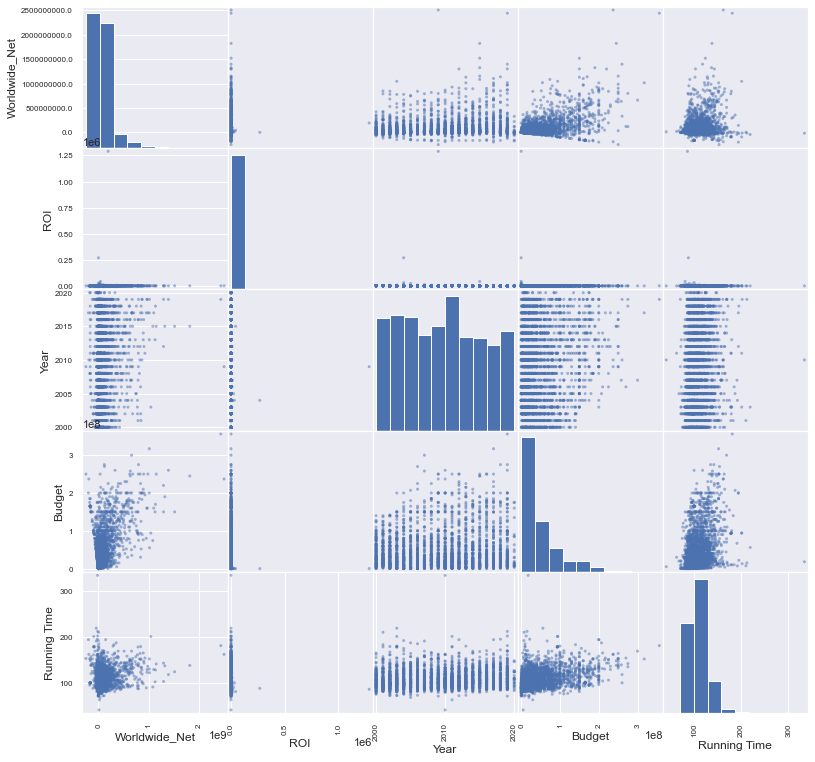

In [100]:
# Exploring the relationships between integer columns that I was planning to use for analysis
pd.plotting.scatter_matrix(df_budgets[['Worldwide_Net', 'ROI', 'Year', 'Budget', 'Running Time']], figsize=(13,13));

I used a heatmap to high level visualize the correlations in my data. A few things I noticed: running time doesn't look like a promising column, there are some correlations between budget and the money columns, and once again I can see that my ROI column has some issues.

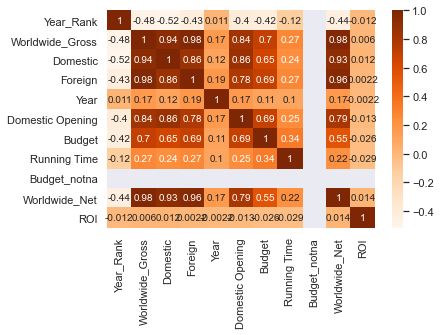

In [101]:
# Checking for correlations in the data
sns.heatmap(df_budgets.corr(), cmap='Oranges', annot=True);

# Q1: What should the budget be?

## Looking at ROI and Worldwide Net

Return on investment (ROI) is a more meaningful metric than strict gross income of the movie as it is possible to have a movie that sells a lot of tickets but doesn't actually make any money. However, it is still important to look at how much the movie made in general. A movie with a large ROI but a small budget doesn't return that much money when looking at bulk of dollars. Ideally you would want to maximize your ROI and also the net amount that you make off of the movie.

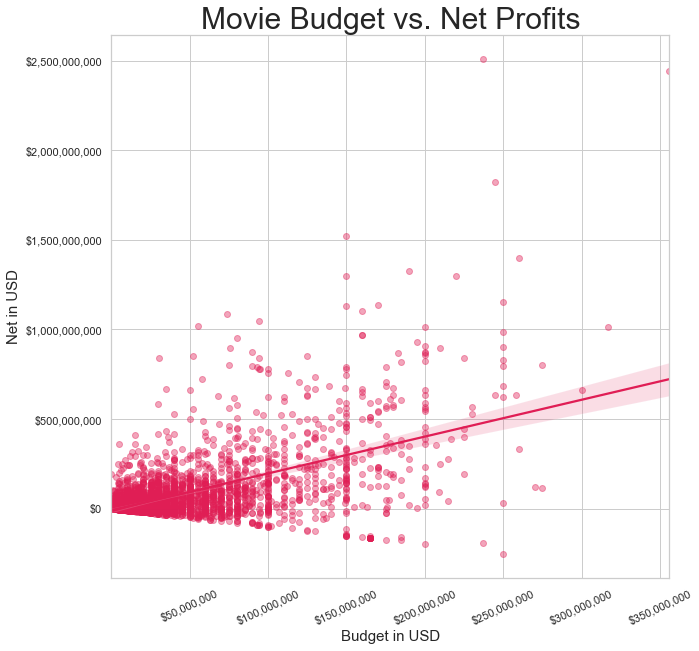

In [422]:
# Pulling out the fig and axes and setting the fig size
fig, ax = plt.subplots(figsize=(10,10))
# Plotting the actual graph
sns.regplot(x="Budget", y="Worldwide_Net", data=df_budgets, ax=ax, scatter_kws={'alpha':0.4}, color="#e01e55");
# Formatting the ticks so that the money will display with $ and commas
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
ax.xaxis.set_major_formatter(tick)
# Setting the labels, title, and font sizes
ax.set_ylabel('Net in USD', fontsize=15)
ax.set_xlabel('Budget in USD', fontsize=15)
ax.set_title('Movie Budget vs. Net Profits', fontsize=30)
# Rotating the x ticks 
plt.xticks(rotation=25);



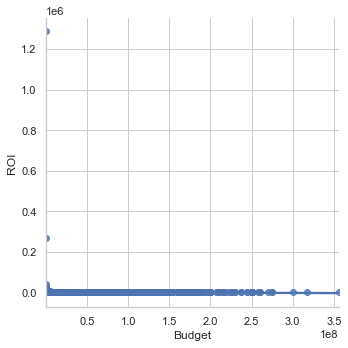

In [317]:
# Looking at budget vs ROI and there are some outliers that need to be removed
g = sns.lmplot(x="Budget", y="ROI",
               height=5, data=df_budgets)

In [104]:
# Looking at my highest entries for ROI to see what is throwing off the data in that column
df_budgets.sort_values('ROI', ascending=False).head()

,Year_Rank,Title,Worldwide_Gross,Domestic,Percent_Domestic,Foreign,Percent_Foreign,Year,Domestic Distributor,Domestic Opening,Budget,Earliest Release Date,MPAA,Running Time,Genres,Budget_notna,Earliest Release Month,Worldwide_Net,ROI
9885,32,Paranormal Activity,193355800,107918810,55.8%,85436990,44.2%,2009,Paramount PicturesSee full company information...,77873,15000,"September 25, 2009\n (Domestic)",R,86,"[Horror, Mystery, Thriller]",True,September,193340800,1289038.667
12481,309,Tarnation,592014,592014,100%,0,-,2004,Wellspring MediaSee full company information\n\n,12740,220,"October 6, 2004\n (Domestic)",NaN,88,"[Biography, Documentary]",True,October,591794,269097.273
6777,130,The Gallows,42964410,22764410,53%,20200000,47%,2015,Warner Bros.See full company information\n\n,9808463,100000,"July 9, 2015\n (4 markets)",R,81,"[Horror, Mystery, Sci-Fi, Thriller]",True,July,42864410,42964.410
12307,135,Super Size Me,20645757,11536423,55.9%,9109334,44.1%,2004,IDP DistributionSee full company information\n\n,516641,65000,"May 7, 2004\n (Domestic)",PG-13,100,[Documentary],True,May,20580757,31762.703
7718,341,My Date with Drew,262770,181041,68.9%,81729,31.1%,2005,Slowhand Cinema ReleasingSee full company info...,85223,1100,"August 5, 2005\n (Domestic)",PG,90,[Documentary],True,August,261670,23888.182


## Removing Outliers From ROI

In [105]:
# Identifying the first and third quartiles in my dataframe for ROI
q1_roi = np.percentile(df_budgets['ROI'], 25)
q3_roi = np.percentile(df_budgets['ROI'], 75)
# Calculating the interquartile range
IQR_roi = q3_roi - q1_roi
# Calculating the maximum and minimum ranges for ROI
minimum_roi = q1_roi - (IQR_roi * 1.5)
maximum_roi = q3_roi + (IQR_roi * 1.5)

In [106]:
# Creating a new dataframe that has the removed outliers for the ROI column
df_roi_fixed = df_budgets[(df_budgets['ROI'] >= minimum_roi) & (df_budgets['ROI'] <= maximum_roi)]

In [107]:
# Checking how many items I lost. This is still a good sized set of data.
df_roi_fixed.shape

(2621, 19)

In [108]:
# Rechecking the top ROI values to see that they are much more reasonable
df_roi_fixed.sort_values('ROI', ascending=False).head()

,Year_Rank,Title,Worldwide_Gross,Domestic,Percent_Domestic,Foreign,Percent_Foreign,Year,Domestic Distributor,Domestic Opening,Budget,Earliest Release Date,MPAA,Running Time,Genres,Budget_notna,Earliest Release Month,Worldwide_Net,ROI
199,40,The Addams Family,203044905,100044905,49.3%,103000000,50.7%,2019,United Artists ReleasingSee full company infor...,30300007,24000000,"October 11, 2019\n (Domestic, EMEA)",PG,86,"[Animation, Comedy, Family, Fantasy, Horror]",True,October,179044905,846.020
2594,13,Sing,634151679,270395425,42.6%,363756254,57.4%,2016,Universal PicturesSee full company information...,35258145,75000000,"December 2, 2016\n (Norway)",PG,108,"[Animation, Comedy, Family, Musical]",True,December,559151679,845.536
6648,1,Star Wars: Episode VII - The Force Awakens,2068223624,936662225,45.3%,1131561399,54.7%,2015,Walt Disney Studios,247966675,245000000,"December 16, 2015\n (EMEA, APAC)",PG-13,138,"[Action, Adventure, Sci-Fi]",True,December,1823223624,844.173
12205,33,Dodgeball,168423227,114326736,67.9%,54096491,32.1%,2004,Twentieth Century FoxSee full company informat...,30070196,20000000,"June 18, 2004\n (Domestic)",PG-13,92,"[Comedy, Sport]",True,June,148423227,842.116
7517,140,Hustle & Flow,23563727,22202809,94.2%,1360918,5.8%,2005,Paramount ClassicsSee full company information...,8017808,2800000,"July 22, 2005\n (Domestic)",R,116,"[Crime, Drama, Music]",True,July,20763727,841.562


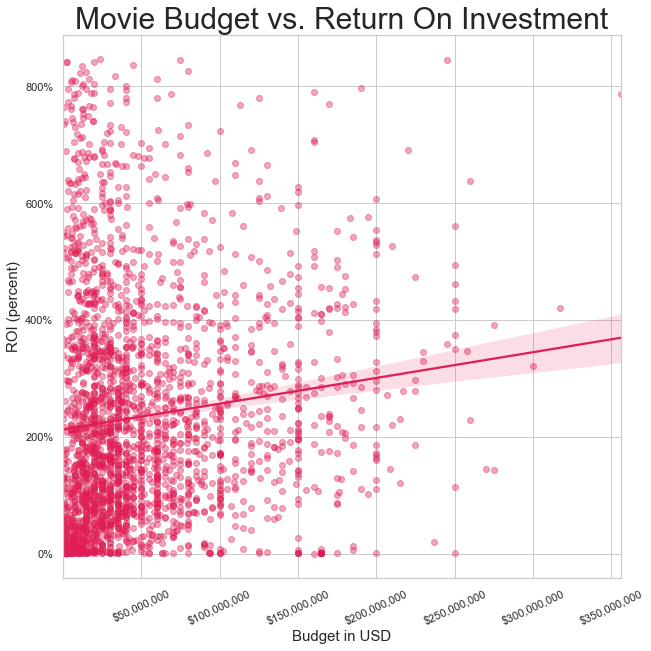

In [421]:
# Rerunning the budget vs ROI plot now that the outliers are removed
# There is a positive trend between budget and ROI

# Pulling out the fig and axes and setting the fig size
fig, ax = plt.subplots(figsize=(10,10))
# Plotting the graph
sns.regplot(x="Budget", y="ROI", data=df_roi_fixed, ax=ax, scatter_kws={'alpha':0.4}, color="#e01e55")

# Formatting the xticks so that the money will display with $ and commas
fmt1 = '${x:,.0f}'
tick1 = mtick.StrMethodFormatter(fmt1)
ax.xaxis.set_major_formatter(tick1)

# Formatting the yticks so that the values will display with a %
fmt2 = '{x:.0f}%'
tick2 = mtick.StrMethodFormatter(fmt2)
ax.yaxis.set_major_formatter(tick2)

# Setting the labels, title, and font sizes
ax.set_ylabel('ROI (percent)', fontsize=15)
ax.set_xlabel('Budget in USD', fontsize=15)
ax.set_title('Movie Budget vs. Return On Investment', fontsize=30)
# Rotating the x ticks 
plt.xticks(rotation=25);

## Maximizing ROI and Net

The ultimate goal is for movies to maximize ROI and net. I then decided to slice out all the movies in the 90th percentile for both categories. That would represent the movies that fall in the top right of this graph because ideally you would want your movie to be high in both categories.

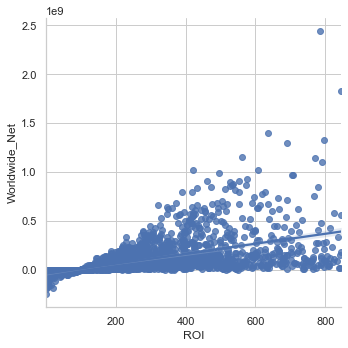

In [319]:
# Plotting ROI vs net
g = sns.lmplot(x="ROI", y="Worldwide_Net",
               height=5, data=df_roi_fixed)

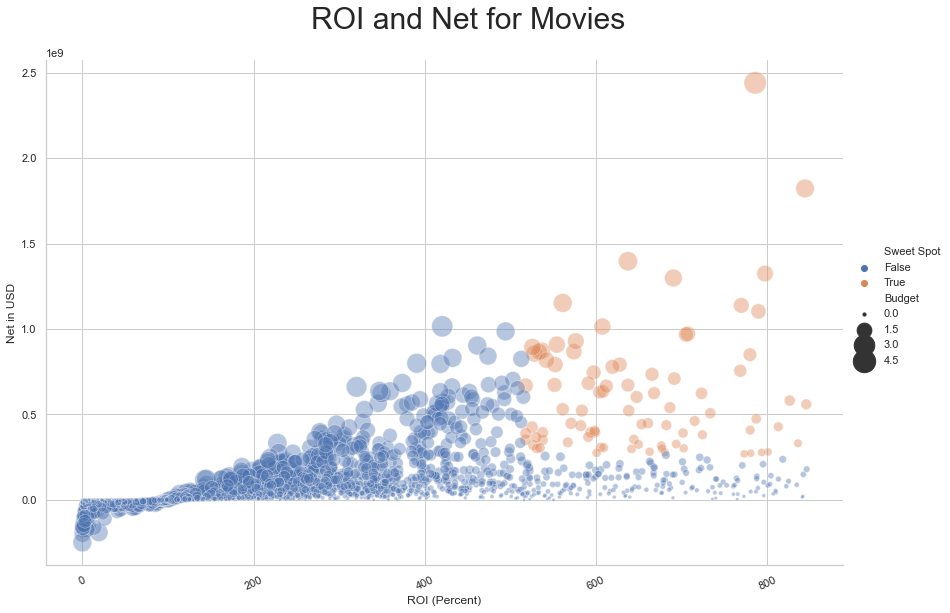

In [423]:
# sns.relplot(x="ROI", y="Worldwide_Net", hue="Sweet Spot", size='Budget'
#             sizes=(40, 400), alpha=.5, palette="muted",
#             height=6, data=df_roi_fixed, size=8, aspect=1);
# fig, ax = plt.subplots(figsize=(10,10))
g = sns.relplot(x="ROI", y="Worldwide_Net", hue="Sweet Spot", size="Budget", 
                data=df_roi_fixed, sizes=(10, 500), alpha=.4, height=8, aspect=1.5)
g.fig.suptitle('ROI and Net for Movies', y=1.05, fontsize=30)
g.set(xlabel = 'ROI (Percent)', ylabel='Net in USD')

# fmt1 = '${x:,.0f}'
# tick1 = mtick.StrMethodFormatter(fmt1)
# ax.yaxis.set_major_formatter(tick1)

# fmt2 = '{x:.0f}%'
# tick2 = mtick.StrMethodFormatter(fmt2)
# ax.xaxis.set_major_formatter(tick2)

# ax.set_ylabel('Total Net in USD', fontsize=15)
# ax.set_xlabel('ROI', fontsize=15)
# ax.set_title('Movie Budget vs. Return On Investment', fontsize=30)

plt.xticks(rotation=25);

In [111]:
# Finding the 90th percentile of both ROI and net
roi_90 = np.percentile(df_roi_fixed['ROI'], 90)
net_90 = np.percentile(df_budgets['Worldwide_Net'], 90)

In [112]:
# Creating my "sweet spot" dataframe
df_sweetspot = df_roi_fixed[(df_roi_fixed['ROI'] >= roi_90) & (df_roi_fixed['Worldwide_Net'] >= net_90)]

In [113]:
# Checking the entries of my new dataframe
df_sweetspot.shape

(86, 19)

In [114]:
df_roi_fixed['Sweet Spot'] = ((df_roi_fixed['ROI'] >= roi_90 ) & (df_roi_fixed['Worldwide_Net'] >= net_90))

C:\Users\drudi\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [115]:
df_roi_fixed['Sweet Spot'] = df_roi_fixed['Sweet Spot'].astype('str')

C:\Users\drudi\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [116]:
df_roi_fixed['Sweet Spot'].value_counts()

False    2535
True       86
Name: Sweet Spot, dtype: int64

In [117]:
df_roi_fixed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2621 entries, 0 to 12594
Data columns (total 20 columns):
Year_Rank                 2621 non-null int64
Title                     2621 non-null object
Worldwide_Gross           2621 non-null int64
Domestic                  2621 non-null int64
Percent_Domestic          2621 non-null object
Foreign                   2621 non-null int64
Percent_Foreign           2621 non-null object
Year                      2621 non-null int64
Domestic Distributor      2600 non-null object
Domestic Opening          2621 non-null int64
Budget                    2621 non-null int64
Earliest Release Date     2621 non-null object
MPAA                      2471 non-null object
Running Time              2621 non-null int64
Genres                    2621 non-null object
Budget_notna              2621 non-null bool
Earliest Release Month    2621 non-null object
Worldwide_Net             2621 non-null int64
ROI                       2621 non-null float64
Sweet Spo

In [336]:
fig = px.scatter(data_frame=df_roi_fixed, x="ROI", y="Worldwide_Net", size="Budget", color="Sweet Spot",
           hover_name="Title", size_max=60)
fig.show();

I now wanted to compare that stats for my "sweet spot" dataframe to my previous dataframes. Particularly I was looking at the median and mean budgets for all three. I was also looking at the ROI and net for all three to see how the "sweet spot" compares to the others before solidifying my budget range recommendation.

In [119]:
# Looking at the stats for my new dataframe
df_sweetspot.describe()

,Year_Rank,Worldwide_Gross,Domestic,Foreign,Year,Domestic Opening,Budget,Running Time,Worldwide_Net,ROI
count,86.000,86.000,86.000,86.000,86.000,86.000,86.000,86.000,86.000,86.000
mean,9.837,730057884.977,280501524.535,449556360.442,2011.674,82680302.849,113848837.209,120.663,616209047.767,648.927
std,8.157,424480544.182,153002618.977,292266432.326,5.898,57333420.002,61912370.225,22.470,366084848.194,94.465
min,1.000,309232797.000,26830068.000,139614539.000,2000.000,0.000,40000000.000,81.000,269232797.000,517.701
25%,3.000,431286765.500,176480600.000,246580748.500,2007.000,44134023.000,69250000.000,105.000,351686217.500,571.710
50%,8.000,602892870.500,250527527.000,357176507.000,2013.000,67915345.500,92500000.000,118.000,514392870.500,637.726
75%,15.000,938447824.750,352852900.750,545187451.750,2017.000,103258965.750,150000000.000,139.500,788353142.500,706.884
max,31.000,2797800564.000,936662225.000,1939427564.000,2019.000,357115007.000,356000000.000,181.000,2441800564.000,845.536


In [120]:
# Looking at the stats for all the movies with budget info
df_budgets.describe()

,Year_Rank,Worldwide_Gross,Domestic,Foreign,Year,Domestic Opening,Budget,Running Time,Worldwide_Net,ROI
count,2817.000,2817.000,2817.000,2817.000,2817.000,2817.000,2817.000,2817.000,2817.000,2817.000
mean,116.239,140311172.432,60564152.871,79747019.561,2009.108,18794527.474,48748651.924,109.363,91562520.508,947.336
std,114.124,219925042.893,81394004.674,146011221.819,5.754,26161909.373,50395889.057,19.667,188123041.375,24834.876
min,1.000,30.000,0.000,0.000,2000.000,0.000,220.000,41.000,-249863919.000,0.000
25%,39.000,18637690.000,11368012.000,4205812.000,2004.000,2679027.000,14000000.000,96.000,-653651.000,91.672
50%,85.000,62882090.000,34432201.000,25568985.000,2009.000,11200000.000,30000000.000,106.000,30100369.000,210.544
75%,148.000,164874275.000,75600072.000,85400000.000,2014.000,23323463.000,65000000.000,119.000,106714959.000,394.454
max,830.000,2797800564.000,936662225.000,1994570654.000,2020.000,357115007.000,356000000.000,334.000,2507336793.000,1289038.667


In [121]:
# Looking at the stats for movies with the ROI outliers removed
df_roi_fixed.describe()

,Year_Rank,Worldwide_Gross,Domestic,Foreign,Year,Domestic Opening,Budget,Running Time,Worldwide_Net,ROI
count,2621.000,2621.000,2621.000,2621.000,2621.000,2621.000,2621.000,2621.000,2621.000,2621.000
mean,120.070,130711152.895,56866789.149,73844363.746,2008.965,18171675.978,50811204.940,109.544,79899947.955,234.785
std,116.135,203503488.946,76714022.422,133432538.695,5.730,25500137.144,50891460.861,19.661,168491676.797,192.327
min,1.000,30.000,0.000,0.000,2000.000,0.000,2000.000,41.000,-249863919.000,0.000
25%,42.000,17347231.000,10301706.000,3647940.000,2004.000,2861903.000,15000000.000,96.000,-1451835.000,84.307
50%,89.000,59389433.000,32598931.000,22760942.000,2009.000,10987006.000,33000000.000,106.000,25401502.000,190.874
75%,151.000,155929020.000,71756802.000,80016949.000,2014.000,22413710.000,70000000.000,119.000,94056873.000,342.539
max,830.000,2797800564.000,936662225.000,1939427564.000,2020.000,357115007.000,356000000.000,334.000,2441800564.000,846.020


As you can see in the comparison stats of these three datasets, the mean and median budget for the "sweet spot" is much higher. But the "sweet spot" has much higher mean and median net returns than the all the movies in the budgets dataframe or the fixed ROI dataframe. The "sweet spot" movies also have a much higher mean and median ROI than the movies in the fixed ROI dataframe (remember that this is the dataframe with the ROI outliers removed). This leads me to my first recommendation.

## Recommendation: Budget should be between 93 million and 114 million USD

For movies in the 90th percentile for both ROI and net, the median budgets were 93 million and the mean budgets were 114 million. To maximize net returns and ROI the movie budget should be between 93 and 114 million.

# Q2: What genre should the movie be?

## Genre and Profits

My dataframe had the genre values stored as a list for each entry. My methodology here was to use .explode() to create separate entries for each genre that a movie was listed as. Then I could plot the genres based on net profits and ROI to find out what genres were the most successful.

With most movies having multiple genres listed, I also wanted to find out if there was a relationship between the number of genres a movie had and its money making potential.

In [217]:
# Created a new column that counted the number of genres a movie had listed from the budgets dataframe
df_budgets['Number Of Genres'] = df_budgets['Genres'].map(lambda x: len(x))

C:\Users\drudi\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [218]:
# Checked the new column
df_budgets.head()

,Year_Rank,Title,Worldwide_Gross,Domestic,Percent_Domestic,Foreign,Percent_Foreign,Year,Domestic Distributor,Domestic Opening,Budget,Earliest Release Date,MPAA,Running Time,Genres,Budget_notna,Earliest Release Month,Worldwide_Net,ROI,Number Of Genres
0,1,Bad Boys for Life,419074646,204417855,48.8%,214656791,51.2%,2020,Sony Pictures Entertainment (SPE)See full comp...,62504105,90000000,"January 15, 2020\n (LATAM, APAC)",R,124,"[Action, Comedy, Crime, Thriller]",True,January,329074646,465.638,4
1,2,Sonic the Hedgehog,306766470,146066470,47.6%,160700000,52.4%,2020,Paramount PicturesSee full company information...,58018348,85000000,"February 12, 2020\n (APAC, EMEA)",PG,99,"[Action, Adventure, Comedy, Family, Sci-Fi]",True,February,221766470,360.902,5
2,3,Dolittle,224752486,77047065,34.3%,147705421,65.7%,2020,Universal PicturesSee full company information...,21844045,175000000,"January 8, 2020\n (South Korea)",PG,101,"[Adventure, Comedy, Family, Fantasy]",True,January,49752486,128.430,4
3,4,Birds of Prey: And the Fantabulous Emancipatio...,201858461,84158461,41.7%,117700000,58.3%,2020,Warner Bros.See full company information\n\n,33010017,84500000,"February 5, 2020\n (APAC, EMEA)",R,109,"[Action, Adventure, Crime]",True,February,117358461,238.886,3
4,5,The Invisible Man,128251913,64914050,50.6%,63337863,49.4%,2020,Universal PicturesSee full company information...,28205665,7000000,"February 26, 2020\n (EMEA, APAC)",R,124,"[Horror, Mystery, Sci-Fi, Thriller]",True,February,121251913,1832.170,4


In [219]:
# Created the same column in my dataframe with the fixed ROI values so that I could compared
# number of genres against the ROI column
df_roi_fixed['Number Of Genres'] = df_roi_fixed['Genres'].map(lambda x: len(x))

C:\Users\drudi\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [222]:
# Checked that my new column was added
df_roi_fixed.head()

,Year_Rank,Title,Worldwide_Gross,Domestic,Percent_Domestic,Foreign,Percent_Foreign,Year,Domestic Distributor,Domestic Opening,...,Earliest Release Date,MPAA,Running Time,Genres,Budget_notna,Earliest Release Month,Worldwide_Net,ROI,Sweet Spot,Number Of Genres
0,1,Bad Boys for Life,419074646,204417855,48.8%,214656791,51.2%,2020,Sony Pictures Entertainment (SPE)See full comp...,62504105,...,"January 15, 2020\n (LATAM, APAC)",R,124,"[Action, Comedy, Crime, Thriller]",True,January,329074646,465.638,False,4
1,2,Sonic the Hedgehog,306766470,146066470,47.6%,160700000,52.4%,2020,Paramount PicturesSee full company information...,58018348,...,"February 12, 2020\n (APAC, EMEA)",PG,99,"[Action, Adventure, Comedy, Family, Sci-Fi]",True,February,221766470,360.902,False,5
2,3,Dolittle,224752486,77047065,34.3%,147705421,65.7%,2020,Universal PicturesSee full company information...,21844045,...,"January 8, 2020\n (South Korea)",PG,101,"[Adventure, Comedy, Family, Fantasy]",True,January,49752486,128.430,False,4
3,4,Birds of Prey: And the Fantabulous Emancipatio...,201858461,84158461,41.7%,117700000,58.3%,2020,Warner Bros.See full company information\n\n,33010017,...,"February 5, 2020\n (APAC, EMEA)",R,109,"[Action, Adventure, Crime]",True,February,117358461,238.886,False,3
6,7,The Call of the Wild,107604626,62342368,57.9%,45262258,42.1%,2020,Twentieth Century FoxSee full company informat...,24791624,...,"February 19, 2020\n (EMEA, APAC)",PG,100,"[Adventure, Drama, Family]",True,February,-27395374,79.707,False,3


In [279]:
# Used .explode() to create dataframes that assigned a new line for each entry per genre
df_genres_net = df_budgets.explode('Genres')
df_genres_roi = df_roi_fixed.explode('Genres')

In [280]:
# Checking the exploded dataframe
df_genres_net.head()

,Year_Rank,Title,Worldwide_Gross,Domestic,Percent_Domestic,Foreign,Percent_Foreign,Year,Domestic Distributor,Domestic Opening,Budget,Earliest Release Date,MPAA,Running Time,Genres,Budget_notna,Earliest Release Month,Worldwide_Net,ROI,Number Of Genres
0,1,Bad Boys for Life,419074646,204417855,48.8%,214656791,51.2%,2020,Sony Pictures Entertainment (SPE)See full comp...,62504105,90000000,"January 15, 2020\n (LATAM, APAC)",R,124,Action,True,January,329074646,465.638,4
0,1,Bad Boys for Life,419074646,204417855,48.8%,214656791,51.2%,2020,Sony Pictures Entertainment (SPE)See full comp...,62504105,90000000,"January 15, 2020\n (LATAM, APAC)",R,124,Comedy,True,January,329074646,465.638,4
0,1,Bad Boys for Life,419074646,204417855,48.8%,214656791,51.2%,2020,Sony Pictures Entertainment (SPE)See full comp...,62504105,90000000,"January 15, 2020\n (LATAM, APAC)",R,124,Crime,True,January,329074646,465.638,4
0,1,Bad Boys for Life,419074646,204417855,48.8%,214656791,51.2%,2020,Sony Pictures Entertainment (SPE)See full comp...,62504105,90000000,"January 15, 2020\n (LATAM, APAC)",R,124,Thriller,True,January,329074646,465.638,4
1,2,Sonic the Hedgehog,306766470,146066470,47.6%,160700000,52.4%,2020,Paramount PicturesSee full company information...,58018348,85000000,"February 12, 2020\n (APAC, EMEA)",PG,99,Action,True,February,221766470,360.902,5


In [281]:
# Checking the exploded dataframe
df_genres_roi.head()

,Year_Rank,Title,Worldwide_Gross,Domestic,Percent_Domestic,Foreign,Percent_Foreign,Year,Domestic Distributor,Domestic Opening,...,Earliest Release Date,MPAA,Running Time,Genres,Budget_notna,Earliest Release Month,Worldwide_Net,ROI,Sweet Spot,Number Of Genres
0,1,Bad Boys for Life,419074646,204417855,48.8%,214656791,51.2%,2020,Sony Pictures Entertainment (SPE)See full comp...,62504105,...,"January 15, 2020\n (LATAM, APAC)",R,124,Action,True,January,329074646,465.638,False,4
0,1,Bad Boys for Life,419074646,204417855,48.8%,214656791,51.2%,2020,Sony Pictures Entertainment (SPE)See full comp...,62504105,...,"January 15, 2020\n (LATAM, APAC)",R,124,Comedy,True,January,329074646,465.638,False,4
0,1,Bad Boys for Life,419074646,204417855,48.8%,214656791,51.2%,2020,Sony Pictures Entertainment (SPE)See full comp...,62504105,...,"January 15, 2020\n (LATAM, APAC)",R,124,Crime,True,January,329074646,465.638,False,4
0,1,Bad Boys for Life,419074646,204417855,48.8%,214656791,51.2%,2020,Sony Pictures Entertainment (SPE)See full comp...,62504105,...,"January 15, 2020\n (LATAM, APAC)",R,124,Thriller,True,January,329074646,465.638,False,4
1,2,Sonic the Hedgehog,306766470,146066470,47.6%,160700000,52.4%,2020,Paramount PicturesSee full company information...,58018348,...,"February 12, 2020\n (APAC, EMEA)",PG,99,Action,True,February,221766470,360.902,False,5


In [282]:
# Checking just how many genres I'm working with here
df_genres_net['Genres'].value_counts()

Drama          1344
Comedy         1110
Action          840
Thriller        840
Adventure       706
Romance         596
Crime           500
Fantasy         467
Family          430
Sci-Fi          416
Mystery         344
Horror          325
Animation       211
Biography       179
Music           114
History         110
War             110
Musical         100
Sport            97
Western          36
Documentary      36
News              2
Short             1
Name: Genres, dtype: int64

In [283]:
# Removing some genres that don't have many entries to clean it up a little
df_genres_net = df_genres_net[(df_genres_net['Genres'] != 'Short')]
df_genres_net = df_genres_net[(df_genres_net['Genres'] != 'News')]
df_genres_net = df_genres_net[(df_genres_net['Genres'] != 'Western')]
df_genres_net = df_genres_net[(df_genres_net['Genres'] != 'Documentary')]
df_genres_net = df_genres_net[(df_genres_net['Genres'] != 'Sport')]

In [284]:
# Checking that the genres got removed
df_genres_net['Genres'].value_counts()

Drama        1344
Comedy       1110
Action        840
Thriller      840
Adventure     706
Romance       596
Crime         500
Fantasy       467
Family        430
Sci-Fi        416
Mystery       344
Horror        325
Animation     211
Biography     179
Music         114
History       110
War           110
Musical       100
Name: Genres, dtype: int64

In [285]:
# Checking the genres for my ROI dataframe. The values are nearly the same.
df_genres_roi['Genres'].value_counts()

Drama          1246
Comedy         1050
Action          816
Thriller        773
Adventure       676
Romance         556
Crime           487
Fantasy         442
Family          412
Sci-Fi          393
Mystery         299
Horror          261
Animation       200
Biography       167
War             107
History         107
Music           103
Musical          94
Sport            94
Western          36
Documentary      29
News              2
Short             1
Name: Genres, dtype: int64

In [286]:
# Removing the same genres in this dataset so it will be even with the other.
df_genres_roi = df_genres_roi[(df_genres_roi['Genres'] != 'Short')]
df_genres_roi = df_genres_roi[(df_genres_roi['Genres'] != 'News')]
df_genres_roi = df_genres_roi[(df_genres_roi['Genres'] != 'Western')]
df_genres_roi = df_genres_roi[(df_genres_roi['Genres'] != 'Documentary')]
df_genres_roi = df_genres_roi[(df_genres_roi['Genres'] != 'Sport')]

In [287]:
# Verifying that the genres got removed
df_genres_roi['Genres'].value_counts()

Drama        1246
Comedy       1050
Action        816
Thriller      773
Adventure     676
Romance       556
Crime         487
Fantasy       442
Family        412
Sci-Fi        393
Mystery       299
Horror        261
Animation     200
Biography     167
War           107
History       107
Music         103
Musical        94
Name: Genres, dtype: int64

I started with bar plots of the averages over the whole data set for the genres. I needed to drop more genres to be able to plot the genres over the years to see the trends. With so many genres still in the mix the plots will be too messy to make any inferences from.

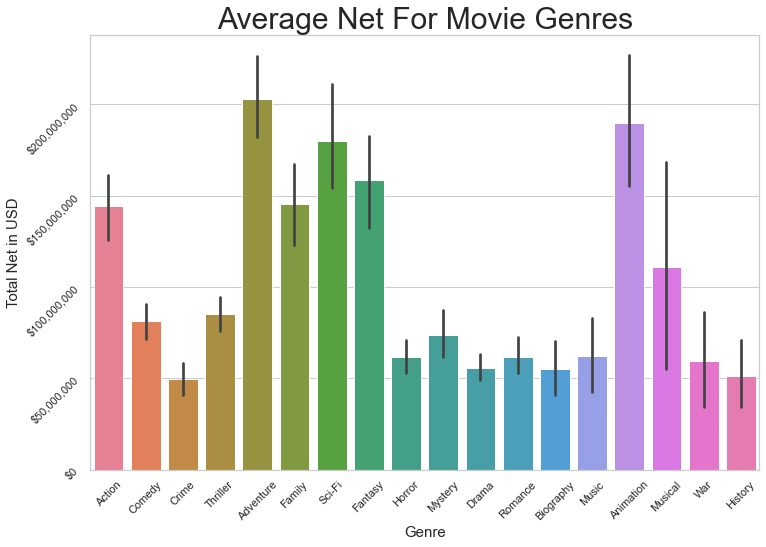

In [374]:
#creating figure and plotting
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x='Genres', y='Worldwide_Net', data=df_genres_net, palette="husl")


fmt1 = '${x:,.0f}'
tick1 = mtick.StrMethodFormatter(fmt1)
ax.yaxis.set_major_formatter(tick1)

ax.set_ylabel('Net in USD', fontsize=15)
ax.set_xlabel('Genre', fontsize=15)
ax.set_title('Average Net For Movie Genres', fontsize=30)

# fmt2 = '{x:.0f}%'
# tick2 = mtick.StrMethodFormatter(fmt2)
# ax.xaxis.set_major_formatter(tick2)

# ax.set_ylabel('Total Net in USD', fontsize=15)
# ax.set_xlabel('ROI', fontsize=15)
# ax.set_title('Movie Budget vs. Return On Investment', fontsize=30)

plt.xticks(rotation=45)
plt.yticks(rotation=45);

There is quite a large amount of difference here between the genres and the net. The obvious winners are action, adventure, animation, family, fantasy, and sci-fi. Based on this graph it looks like there are quite a few genres at the bottom so I will look at ROI and compare to decide what 5 or so could be dropped to be able to better look at the genre trends over time.

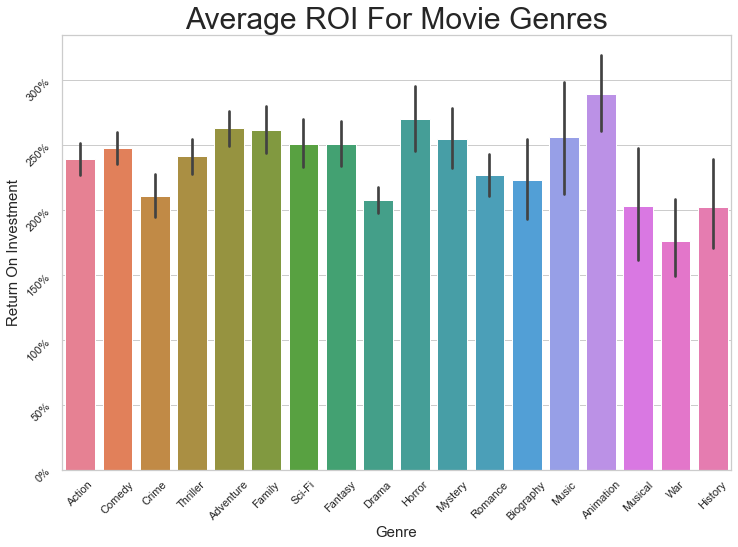

In [376]:
# Plotting the figure
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x='Genres', y='ROI', data=df_genres_roi, palette="husl")

fmt2 = '{x:.0f}%'
tick2 = mtick.StrMethodFormatter(fmt2)
ax.yaxis.set_major_formatter(tick2)

ax.set_ylabel('Return On Investment', fontsize=15)
ax.set_xlabel('Genre', fontsize=15)
ax.set_title('Average ROI For Movie Genres', fontsize=30)
plt.xticks(rotation=45)
plt.yticks(rotation=45); 

Overall there is more dramatic difference between genres in total net than from ROI. But ROI still shows us that war, history, musical, drama, and crime are below the others and that animation has the best ROI on average. 

From here I want to consider the lowest genres for net and ROI. Based on the two factors, it makes sense to remove history, war, musical, biography, music, drama, and crime.

In [396]:
# Removing more genres
df_genres_net = df_genres_net[(df_genres_net['Genres'] != 'War')]
df_genres_net = df_genres_net[(df_genres_net['Genres'] != 'History')]
df_genres_net = df_genres_net[(df_genres_net['Genres'] != 'Musical')]
df_genres_net = df_genres_net[(df_genres_net['Genres'] != 'Biography')]
df_genres_net = df_genres_net[(df_genres_net['Genres'] != 'Music')]
df_genres_net = df_genres_net[(df_genres_net['Genres'] != 'Drama')]
df_genres_net = df_genres_net[(df_genres_net['Genres'] != 'Crime')]

In [397]:
# Removing the same genres
df_genres_roi = df_genres_roi[(df_genres_roi['Genres'] != 'War')]
df_genres_roi = df_genres_roi[(df_genres_roi['Genres'] != 'History')]
df_genres_roi = df_genres_roi[(df_genres_roi['Genres'] != 'Musical')]
df_genres_roi = df_genres_roi[(df_genres_roi['Genres'] != 'Biography')]
df_genres_roi = df_genres_roi[(df_genres_roi['Genres'] != 'Music')]
df_genres_roi = df_genres_roi[(df_genres_roi['Genres'] != 'Drama')]
df_genres_roi = df_genres_roi[(df_genres_roi['Genres'] != 'Crime')]

In [398]:
# Checking that the values got dropped
df_genres_net['Genres'].value_counts()

Comedy       1110
Action        840
Thriller      840
Adventure     706
Romance       596
Fantasy       467
Family        430
Sci-Fi        416
Mystery       344
Horror        325
Animation     211
Name: Genres, dtype: int64

In [399]:
# Checking that the values got dropped
df_genres_roi['Genres'].value_counts()

Comedy       1050
Action        816
Thriller      773
Adventure     676
Romance       556
Fantasy       442
Family        412
Sci-Fi        393
Mystery       299
Horror        261
Animation     200
Name: Genres, dtype: int64

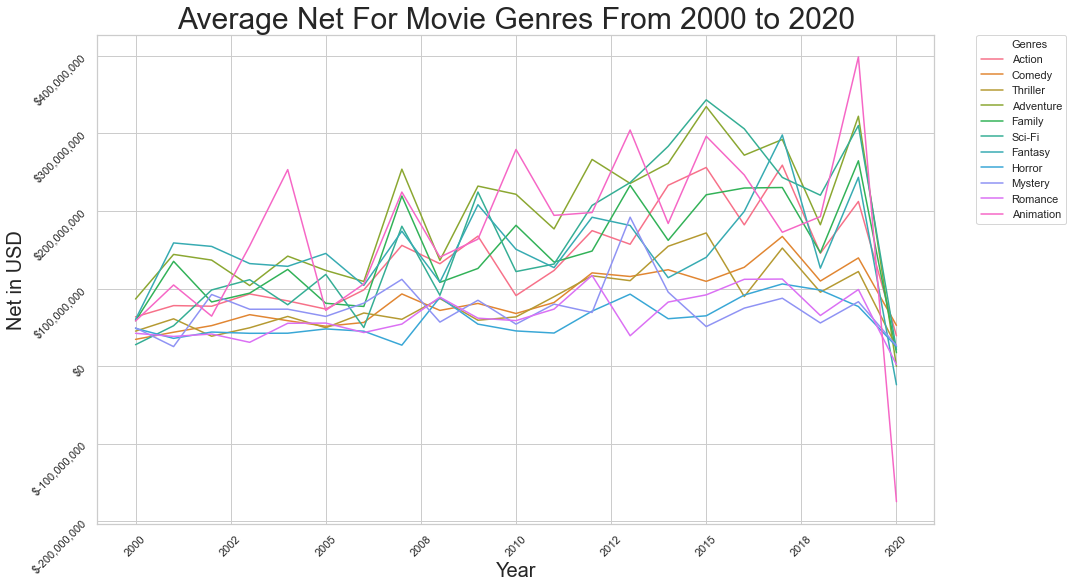

In [406]:
# Setting figure size
fig, ax = plt.subplots(figsize=(15,9))
# Plotting actual figure
sns.lineplot(x='Year', y='Worldwide_Net', hue='Genres', 
             data=df_genres_net, err_style=None, palette='husl')

# Formatting the y-axis ticks to show with $ and commas in the money values
fmt1 = '${x:,.0f}'
tick1 = mtick.StrMethodFormatter(fmt1)
ax.yaxis.set_major_formatter(tick1)

# Formating the x-axis ticks so that the years do not have decimal places
fmt3 = '{x:.0f}'
tick3 = mtick.StrMethodFormatter(fmt3)
ax.xaxis.set_major_formatter(tick3)

# Moving the legend to be outside of the plot
# (https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Setting title and labels
ax.set_ylabel('Net in USD', fontsize=20)
ax.set_xlabel('Year', fontsize=20)
ax.set_title('Average Net For Movie Genres From 2000 to 2020', fontsize=30)

# Rotating the tick labels
plt.xticks(rotation=45)
plt.yticks(rotation=45); 

In the graph above there again are the same genres as from the bar graph that consistently perform well. These genres are action, animation, adventure, family, sci-fi, and fantasy.

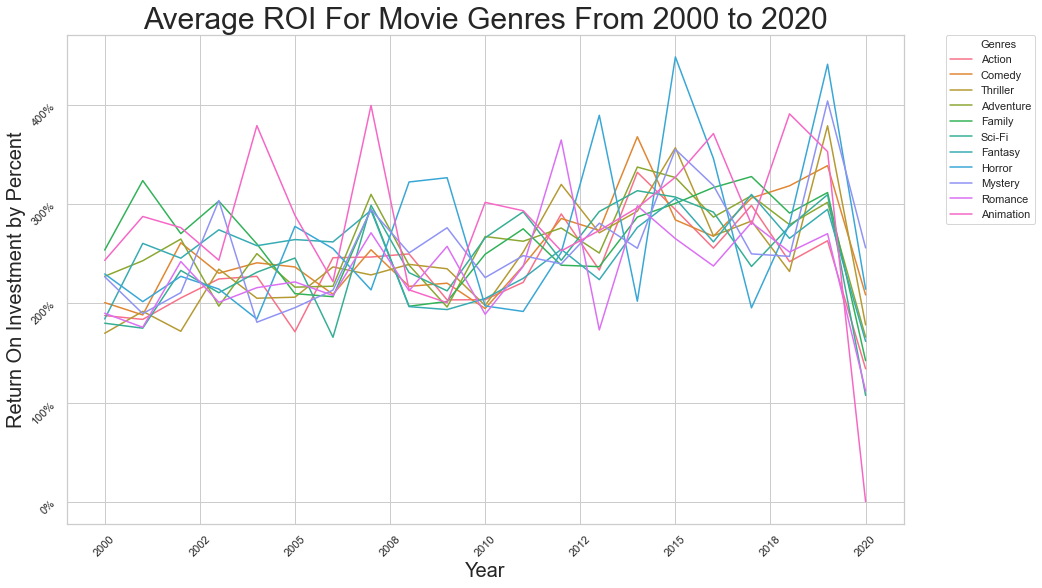

In [407]:
# Graphing the same plot as above but with ROI instead of net
fig, ax = plt.subplots(figsize=(15,9))
sns.lineplot(x='Year', y='ROI', hue='Genres', 
             data=df_genres_roi, err_style=None, palette='husl')

# Formatting the y-axis ticks to show with percentage signs
fmt2 = '{x:.0f}%'
tick2 = mtick.StrMethodFormatter(fmt2)
ax.yaxis.set_major_formatter(tick2)

# Formating the x-axis ticks so that the years do not have decimal places
fmt3 = '{x:.0f}'
tick3 = mtick.StrMethodFormatter(fmt3)
ax.xaxis.set_major_formatter(tick3)

# Moving the legend to be outside of the plot
# (https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Setting title and labels
ax.set_ylabel('Return On Investment By Percent', fontsize=20)
ax.set_xlabel('Year', fontsize=20)
ax.set_title('Average ROI For Movie Genres From 2000 to 2020', fontsize=30)

# Rotating the tick labels
plt.xticks(rotation=45)
plt.yticks(rotation=45); 

As from the bar graph comparing overall ROI, there is less difference between the genres in ROI. But there still are some interesting points to note here. Like horror can be quite unpredictable. Animation has had some pretty big swings in the past but seems to have a more stable ROI for the past 10 years.

## Summary Of Top Genres

The net averages showed us that adventure, sci-fi, animation, fantasy, family, and action are the top genres. Looking at ROI, animation would be the best genre with horror having a high average ROI across all the years, but also having swings of being high and low from year to year which makes it riskier. 

Animation is the best genre overall being a good bet when looking at both ROI and net metrics.

## Stacked bar chart showing different genres over the years based on net profits

In [517]:
year_genres_net = df_genres_net.groupby(['Year', 'Genres'])['Worldwide_Net'].sum()
df_year_genres_net = year_genres_net.to_frame().reset_index()

df_year_genres_net.columns = ['Year', 'Genres', 'Total Net']
df_year_genres_net.set_index('Year')
df_year_genres_net

,Year,Genres,Total Net
0,2000,Action,2543637807
1,2000,Adventure,2943722879
2,2000,Animation,639725159
3,2000,Comedy,2622005916
4,2000,Family,1054242545
5,2000,Fantasy,1143456297
6,2000,Horror,632737026
7,2000,Mystery,641504445
8,2000,Romance,1778447951
9,2000,Sci-Fi,525507509


In [525]:
fig = px.bar(df_year_genres_net, x="Year", y="Total Net", color="Genres", 
             title="Total Net Profits Per Genre From 2000 To 2020")
fig.show()


In [521]:
year_genres_roi = df_genres_roi.groupby(['Year', 'Genres'])['ROI'].mean()
df_year_genres_roi = year_genres_roi.to_frame().reset_index()

df_year_genres_roi.columns = ['Year', 'Genres', 'Average ROI']
df_year_genres_roi.set_index('Year')
df_year_genres_roi

,Year,Genres,Average ROI
0,2000,Action,187.752
1,2000,Adventure,227.325
2,2000,Animation,243.347
3,2000,Comedy,200.822
4,2000,Family,253.759
5,2000,Fantasy,184.308
6,2000,Horror,229.684
7,2000,Mystery,226.855
8,2000,Romance,190.091
9,2000,Sci-Fi,180.040


In [526]:
fig = px.bar(df_year_genres_roi, x="Year", y="Average ROI", color="Genres", 
             title="Average ROI Per Genre From 2000 To 2020")
fig.show()

## Number of Genres

Most movies have many genres listed. I wanted to see if the number of genres that a movie was part of had an affect on the net profits or ROI.

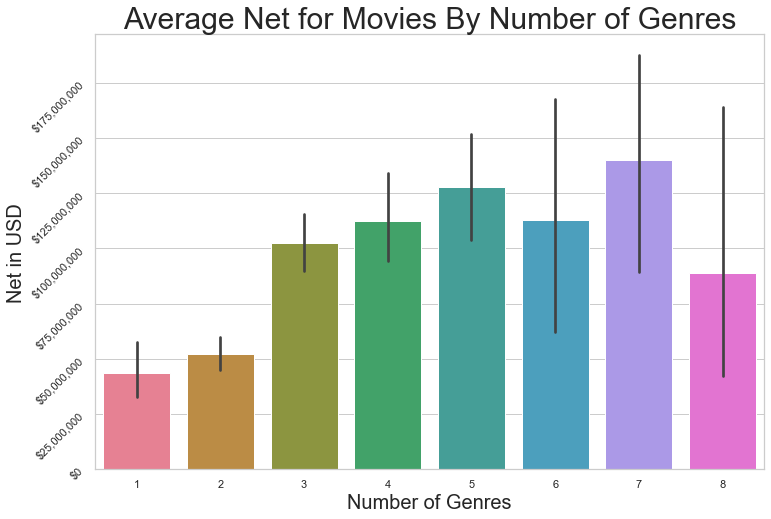

In [412]:
# Plotting the graph
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(data=df_budgets, x='Number Of Genres', y='Worldwide_Net', palette="husl")

# Formatting the y-axis ticks to show with $ and commas in the money values
fmt1 = '${x:,.0f}'
tick1 = mtick.StrMethodFormatter(fmt1)
ax.yaxis.set_major_formatter(tick1)

# Setting title and labels
ax.set_ylabel('Net in USD', fontsize=20)
ax.set_xlabel('Number of Genres', fontsize=20)
ax.set_title('Average Net For Movies By Number of Genres', fontsize=30)

# Rotating the y-axis tick labels
plt.yticks(rotation=45);

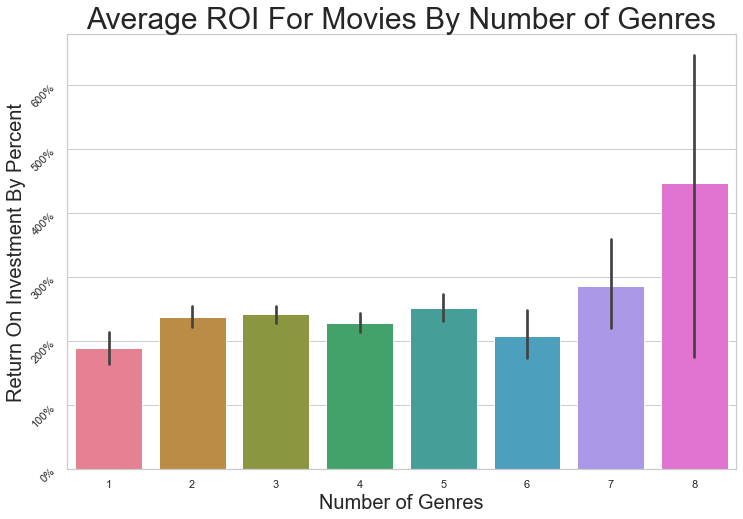

In [414]:
# Plotting the graph
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(data=df_roi_fixed, x='Number Of Genres', y='ROI', palette="husl")

# Formatting the y-axis ticks to show with percentage signs
fmt2 = '{x:.0f}%'
tick2 = mtick.StrMethodFormatter(fmt2)
ax.yaxis.set_major_formatter(tick2)

# Setting title and labels
ax.set_ylabel('Return On Investment By Percent', fontsize=20)
ax.set_xlabel('Number of Genres', fontsize=20)
ax.set_title('Average ROI For Movies By Number of Genres', fontsize=30)

# Rotating the y-axis tick labels
plt.yticks(rotation=45);

The two visuals above show that when it comes to having multiple genres for a movie, increasing the number of genres can increase net particularly. However, the error bars show that there is quite a bit of variance here. So 5 genres would probably be a good compromise to increase net greatly and ROI a little bit while also having the greatest confidence.

## Recommendation: A movie should have 5 genres, one of which should be animation

The other best genres to choose from would be adventure, sci-fi, fantasy, family, and action.

# Q3: What is the best release month?

The data I scraped included the earliest release date for each movie. I wanted to look at ROI and net profits based on what month movies are released. I also thought it would be worth looking to see what the most common months of release are to judge potential competition in crowded months.

I already created an earliest release month column in my dataset during the cleaning process.

## Frequency of Movie Releases Each Month

I started with looking at how many movies have been released each month. I started with original dataframe that has almost 13,000 entries.

In [458]:
# Grabbing the counts of movies released per month
counts = df['Earliest Release Month'].value_counts()

# Turning the counts into a dataframe
counts_df = counts.to_frame().reset_index()

# Naming my columns and setting the index
counts_df.columns =  ['Month', 'Number of Movies']
counts_df.set_index('Month')
counts_df


,Month,Number of Movies
0,September,1411
1,October,1400
2,March,1115
3,August,1110
4,April,1101
5,November,1083
6,May,1011
7,June,998
8,December,909
9,July,904


In [463]:
# Creating a list of the months in order to feed into my plots so they show up in order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
              'September', 'October', 'November', 'December']

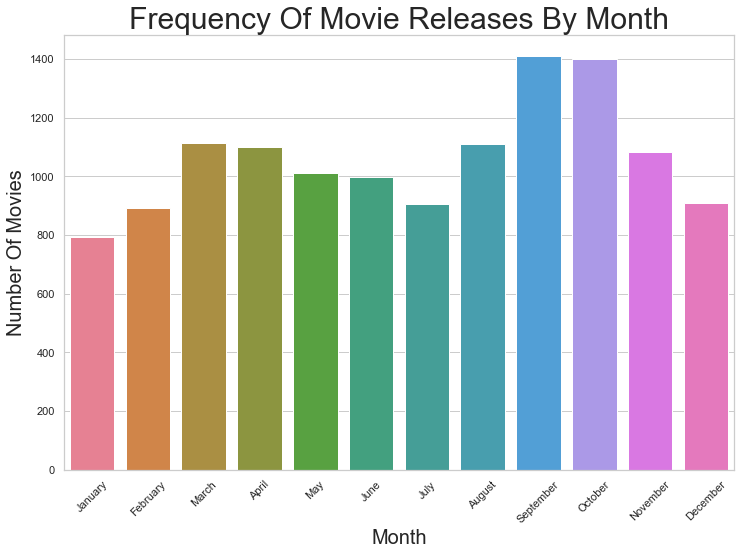

In [464]:
# Plotting my figure
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(data=counts_df, x='Month', y='Number of Movies', order=month_order, palette="husl")

# Setting my labels and title
ax.set_ylabel('Number Of Movies', fontsize=20)
ax.set_xlabel('Month', fontsize=20)
ax.set_title('Frequency Of Movie Releases By Month', fontsize=30)

# Rotating the month labels so that they don't overlap each other
plt.xticks(rotation=45);

I was really surprised to see that September and October were the most common release months. I would have thought it would be the summer months. I decided to plot the same histogram using my dataframe that only contains entries with budget information to see if the trend is the same.

In [462]:
# Grabbing the counts of movies released per month from my dataframe
# that has budget information
counts_sub = df_budgets['Earliest Release Month'].value_counts()

# Turning the counts into a dataframe
counts_sub_df = counts_sub.to_frame().reset_index()

# Naming my columns and setting the index
counts_sub_df.columns = ['Month', 'Number of Movies']
counts_sub_df.set_index('Month')

,Number of Movies
Month,
October,307
September,268
December,267
August,245
November,238
June,237
April,235
March,225
February,211


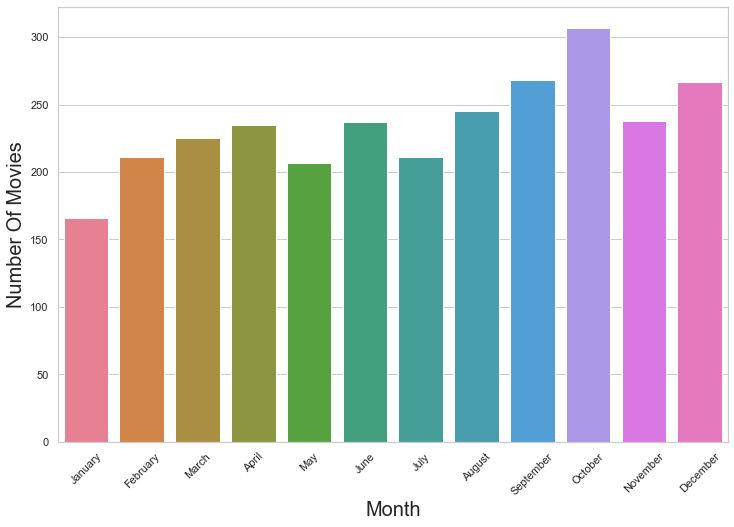

In [467]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(data=counts_sub_df, x='Month', y='Number of Movies', order=month_order, palette="husl")

# Setting my labels
ax.set_ylabel('Number Of Movies', fontsize=20)
ax.set_xlabel('Month', fontsize=20)


# Rotating the month labels so that they don't overlap each other
plt.xticks(rotation=45);

Still the trend holds that fall is when the most movies are released. A quick Google search came up with results saying that movies are more likely to get noticed for award season in winter when movies are released in the fall. Since I don't have any data about award winners, I can't look into the relationship for this current project, but that would be a good follow up project.

## Release Month and Profits

My methodology here is to compare release month to ROI and net to see what the relationships are.

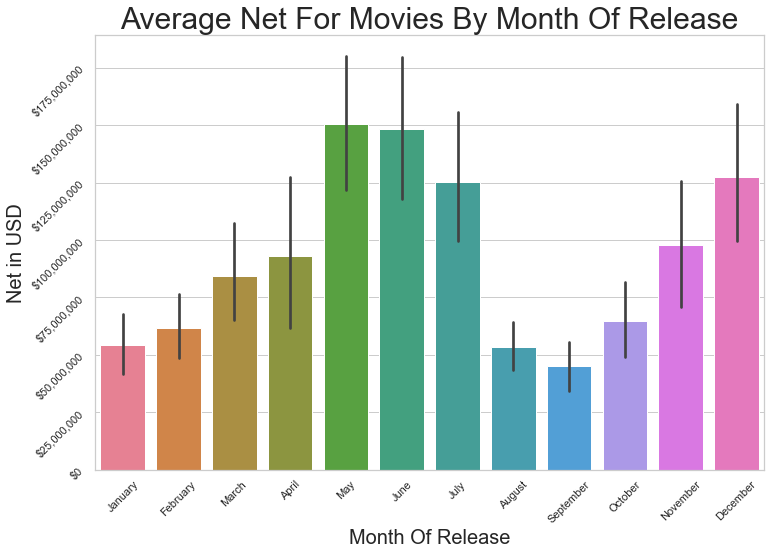

In [469]:
# Plotting my figure
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x='Earliest Release Month', y='Worldwide_Net', data=df_budgets, order=month_order, palette="husl")

# Formatting the y-axis ticks to show with $ and commas in the money values
fmt1 = '${x:,.0f}'
tick1 = mtick.StrMethodFormatter(fmt1)
ax.yaxis.set_major_formatter(tick1)

# Setting title and labels
ax.set_ylabel('Net in USD', fontsize=20)
ax.set_xlabel('Month Of Release', fontsize=20)
ax.set_title('Average Net For Movies By Month Of Release', fontsize=30)

# Rotating the tick labels
plt.xticks(rotation=45)
plt.yticks(rotation=45);

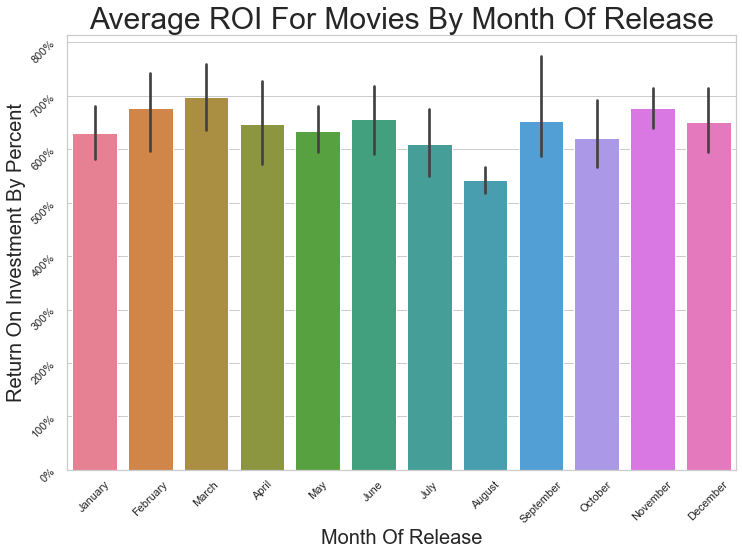

In [472]:

fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x='Earliest Release Month', y='ROI', data=df_sweetspot, order=month_order, palette="husl")

# Formatting the y-axis ticks to show with percentage signs
fmt2 = '{x:.0f}%'
tick2 = mtick.StrMethodFormatter(fmt2)
ax.yaxis.set_major_formatter(tick2)

# Setting title and labels
ax.set_ylabel('Return On Investment By Percent', fontsize=20)
ax.set_xlabel('Month Of Release', fontsize=20)
ax.set_title('Average ROI For Movies By Month Of Release', fontsize=30)

# Rotating the tick labels
plt.xticks(rotation=45)
plt.yticks(rotation=45); 

There is a dramatic difference in net by month of release. The movies with the best net profits are those released in the summer months of May, June, and July. December is also a strong contender. This all makes sense because people like to go see movies in the summer and during the holiday season.

Looking at ROI, August is the worst month and March is the best. It looks like there is a general dip as summer goes on for both net and ROI.

In [499]:
month_genres_net = df_genres_net.groupby(['Earliest Release Month', 'Genres'])['Worldwide_Net'].sum()
df_month_genres_net = month_genres_net.to_frame().reset_index()
df_month_genres_net.columns = ['Month', 'Genres', 'Total Net']
df_month_genres_net.set_index('Month')
df_month_genres_net

,Month,Genres,Total Net
0,April,Action,14451931232
1,April,Adventure,15380053015
2,April,Animation,1614014564
3,April,Comedy,5526016809
4,April,Family,2808780485
5,April,Fantasy,1795124833
6,April,Horror,1830784767
7,April,Mystery,927868225
8,April,Romance,1907415709
9,April,Sci-Fi,11348510523


In [514]:
fig = px.bar(df_month_genres_net, x="Month", y="Total Net", color="Genres", 
             category_orders={'Month': ['January', 'February', 'March', 'April', 
                                        'May', 'June', 'July', 'August', 'September', 
                                        'October', 'November', 'December']}, 
             title="Total Net Profits Per Genre By Month", labels={'Month': 'Release Month'})
fig.show()

In [506]:
month_genres_roi = df_genres_roi.groupby(['Earliest Release Month', 'Genres'])['ROI'].mean()
df_month_genres_roi = month_genres_roi.to_frame().reset_index()
df_month_genres_roi.columns = ['Month', 'Genres', 'Average ROI']
df_month_genres_roi.set_index('Month')
df_month_genres_roi

,Month,Genres,Average ROI
0,April,Action,289.744
1,April,Adventure,320.141
2,April,Animation,354.592
3,April,Comedy,215.656
4,April,Family,224.000
5,April,Fantasy,270.083
6,April,Horror,246.641
7,April,Mystery,210.086
8,April,Romance,201.777
9,April,Sci-Fi,276.207


In [515]:
fig = px.bar(df_month_genres_roi, x="Month", y="Average ROI", color="Genres", 
             category_orders={'Month': ['January', 'February', 'March', 'April', 
                                        'May', 'June', 'July', 'August', 'September', 
                                        'October', 'November', 'December']},
             title="Average ROI Per Genre By Month", labels={'Month': 'Release Month'})
fig.show()

## Release month recommendations

Once again we see Adventure, Sci-Fi, Animation, Action, Family, and Fantasy genres top the list in the net gross categories for every month. 

From a net perspective, the worst month to release a movie is September. The best month would be May or June.

From an ROI perspective June is a good month to release a horror or mystery film. 

The best month by genre: 

Action - April

Adventure - April

Animation - June

Family - June

Fantasy - May

Sci-Fi - December


# Q4: What MPAA rating should the movie be?

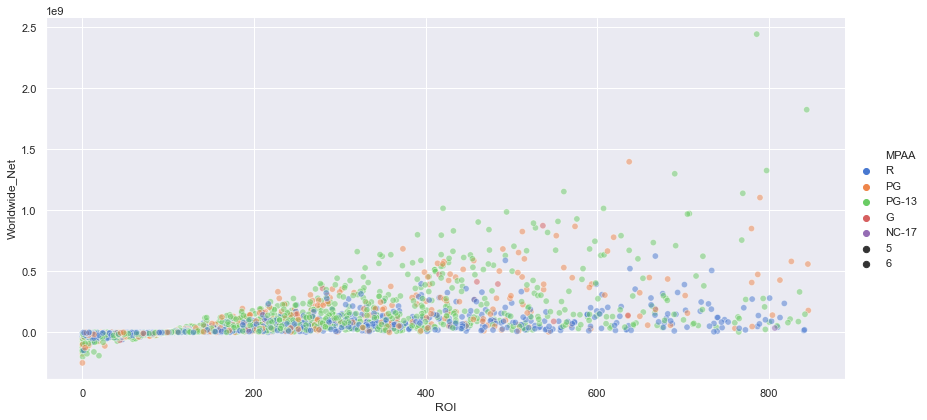

In [246]:
sns.relplot(x="ROI", y="Worldwide_Net", hue="MPAA",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df_roi_fixed, size=6, aspect=2);